In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import networkx as nx
import sys
generation = 4
H = nx.dorogovtsev_goltsev_mendes_graph(generation)
print(H.number_of_nodes(), 'nodes and', H.number_of_edges(), 'edges')
# Force Atlas 2 graph layout from https://github.com/tpoisot/nxfa2.git
pos = nx.spectral_layout(H,scale=1,dim=3)
Xn = [pos[i][0] for i in pos]   # x-coordinates of all nodes
Yn = [pos[i][1] for i in pos]   # y-coordinates of all nodes
Zn = [pos[i][2] for i in pos]   # z-coordinates of all nodes
Xe, Ye, Ze = [], [], []
for edge in H.edges():
    Xe += [pos[edge[0]][0], pos[edge[1]][0], None]   # x-coordinates of all edge ends
    Ye += [pos[edge[0]][1], pos[edge[1]][1], None]   # y-coordinates of all edge ends
    Ze += [pos[edge[0]][2], pos[edge[1]][2], None]   # z-coordinates of all edge ends

degree = [deg[1] for deg in H.degree()]   # list of degrees of all nodes
labels = [str(i) for i in range(H.number_of_nodes())]

edges = go.Scatter3d(x=Xe, y=Ye, z=Ze,
                     mode='lines',
                     marker=dict(size=12,line=dict(color='rgba(217, 217, 217, 0.14)',width=0.5)),
                     hoverinfo='none')
nodes = go.Scatter3d(x=Xn, y=Yn, z=Zn,
                     mode='markers',
                     marker=dict(sizemode = 'area',
                                 sizeref = 0.01, size=degree,
                                 color=degree, colorscale='Viridis',
                                 line=dict(color='rgb(50,50,50)', width=0.5)),
                     text=labels, hoverinfo='text')


axis = dict(showline=False, zeroline=False, showgrid=False, showticklabels=False, title='')
layout = go.Layout(
    title = str(generation) + "-generation Dorogovtsev-Goltsev-Mendes graph",
    width=1000, height=1000,
    showlegend=False,
    scene=dict(xaxis=go.layout.scene.XAxis(axis),
               yaxis=go.layout.scene.YAxis(axis),
               zaxis=go.layout.scene.ZAxis(axis)),
    margin=go.layout.Margin(t=100),
    )
fig = go.Figure(data=[edges,nodes], layout=layout)
fig2 = go.Figure(data=[edges], layout=layout)
py.iplot(fig)
py.iplot(fig2)

42 nodes and 81 edges


In [7]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly import figure_factory as FF
from numpy import mgrid
from skimage import measure
X,Y,Z = mgrid[-1.2:1.2:30j, -1.2:1.2:30j, -1.2:1.2:30j] # three 30^3 grids, each side [-1.2,1.2] in 30 steps
F = ((X*X+Y*Y-0.64)**2 + (Z*Z-1)**2) * \
    ((Y*Y+Z*Z-0.64)**2 + (X*X-1)**2) * \
    ((Z*Z+X*X-0.64)**2 + (Y*Y-1)**2)
vertices, triangles, normals, values = measure.marching_cubes(F, 0.03)  # create an isosurface
# vertices, triangles, normals, values = measure._marching_cubes_lewiner(p, threshold, step_size=step_size, allow_degenerate=True)

x,y,z = zip(*vertices)   # zip(*...) is opposite of zip(...): unzips a list of tuples
fig = FF.create_trisurf(x=x, y=y, z=z, plot_edges=False,
                        simplices=triangles, title="Isosurface", height=900, width=900)
py.iplot(fig)

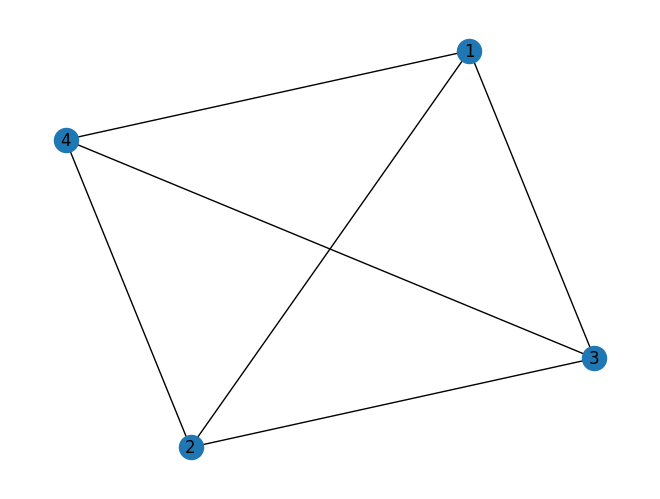

In [8]:

import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with four nodes
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])

# Add edges to connect all of the nodes
G.add_edges_from([(1,2), (1,3), (1,4), (2,3), (2,4), (3,4)])

# Draw the graph using the spring layout
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

# Show the graph
plt.show()

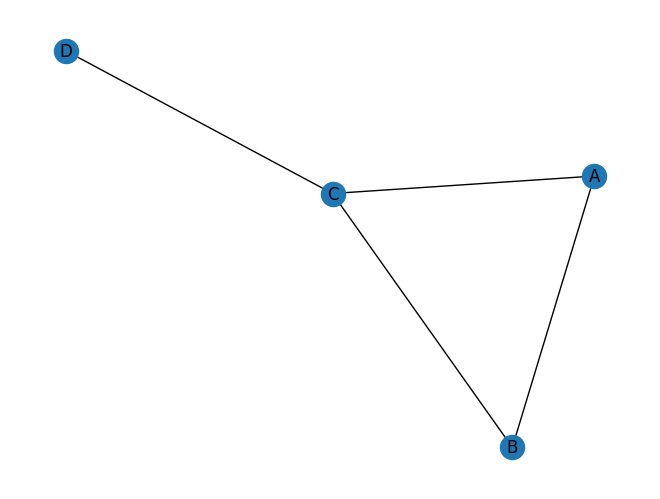

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
g = nx.Graph()

# Add some nodes to the graph
g.add_nodes_from(["A", "B", "C", "D"])

# Add some edges to the graph
g.add_edges_from([("A", "B"), ("A", "C"), ("B", "C"), ("C", "D")])

# Use the spring layout for the nodes
pos = nx.spring_layout(g)

# Draw the graph
nx.draw(g, pos, with_labels=True)

# Show the plot
plt.show()


AttributeError: 'str' object has no attribute 'tk'

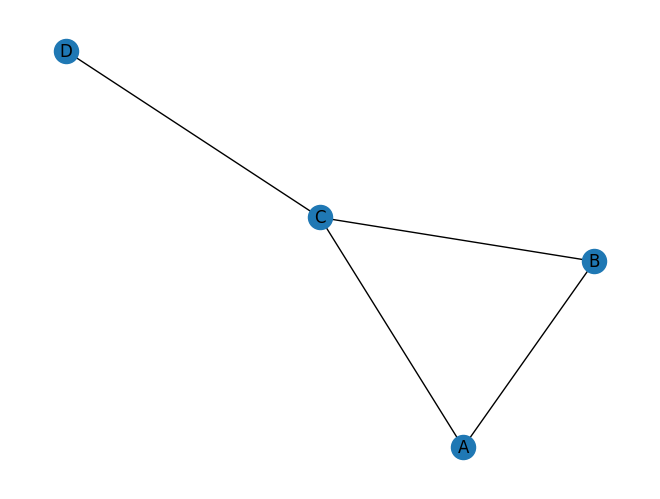

<Figure size 640x480 with 0 Axes>

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Create an empty graph
g = nx.Graph()

# Add some nodes to the graph
g.add_nodes_from(["A", "B", "C", "D"])

# Add some edges to the graph
g.add_edges_from([("A", "B"), ("A", "C"), ("B", "C"), ("C", "D")])

# Use the spring layout for the nodes
pos = nx.spring_layout(g)

# Draw the graph
nx.draw(g, pos, with_labels=True)

# Create a FigureCanvas for the graph
fig = plt.figure()
canvas = FigureCanvasTkAgg(fig, master="root")
canvas.draw()

# Add the FigureCanvas to the GUI application
canvas.get_tk_widget().pack(side="top", fill="both", expand=1)
